In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = '../data/cars.csv'

In [5]:
df = pd.read_csv(data)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# rename columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

### _EDA_

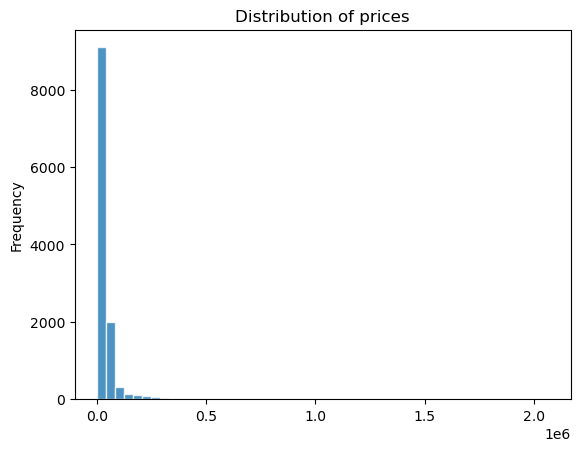

In [30]:
df.msrp.plot(kind='hist', 
                bins=50, 
                ec='white', 
                title = 'Distribution of prices',
                xlabel = 'Price',
                alpha = 0.8
            );

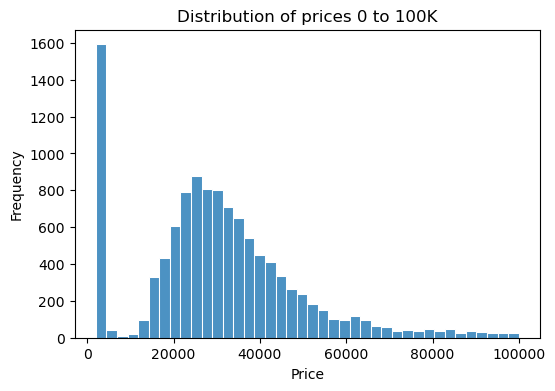

In [27]:

plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, ec='white', alpha=0.8)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices 0 to 100K')

plt.show()

#### Logarithmic transformation

- to achieve normal distribution

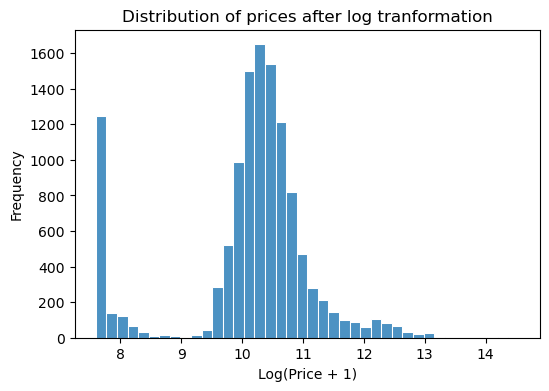

In [28]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, ec='white', alpha=0.8)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [31]:
# calculate nulls per column
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [33]:
df[df.market_category.isnull()]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
87,nissan,200sx,1996,regular_unleaded,115.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,36,26,2009,2000
88,nissan,200sx,1996,regular_unleaded,115.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,36,26,2009,2000
91,nissan,200sx,1997,regular_unleaded,115.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,35,25,2009,2000
92,nissan,200sx,1997,regular_unleaded,115.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,35,25,2009,2000
93,nissan,200sx,1998,regular_unleaded,115.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,35,25,2009,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,subaru,xt,1991,regular_unleaded,145.0,6.0,manual,all_wheel_drive,2.0,NaN,compact,coupe,23,16,640,2000
11809,toyota,yaris_ia,2017,regular_unleaded,106.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,39,30,2031,15950
11810,toyota,yaris_ia,2017,regular_unleaded,106.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,40,32,2031,17050
11867,gmc,yukon,2015,premium_unleaded_(recommended),420.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,21,15,549,64520


In [35]:
df.market_category.nunique()

71

In [36]:
df.market_category.unique()

array(['factory_tuner,luxury,high-performance', 'luxury,performance',
       'luxury,high-performance', 'luxury', 'performance', 'flex_fuel',
       'flex_fuel,performance', nan, 'hatchback',
       'hatchback,luxury,performance', 'hatchback,luxury',
       'luxury,high-performance,hybrid', 'diesel,luxury',
       'hatchback,performance', 'hatchback,factory_tuner,performance',
       'high-performance', 'factory_tuner,high-performance',
       'exotic,high-performance', 'exotic,factory_tuner,high-performance',
       'factory_tuner,performance', 'crossover', 'exotic,luxury',
       'exotic,luxury,high-performance', 'exotic,luxury,performance',
       'factory_tuner,luxury,performance', 'flex_fuel,luxury',
       'crossover,luxury', 'hatchback,factory_tuner,luxury,performance',
       'crossover,hatchback', 'hybrid', 'luxury,performance,hybrid',
       'crossover,luxury,performance,hybrid',
       'crossover,luxury,performance',
       'exotic,factory_tuner,luxury,high-performance',
   

In [41]:
df.market_category.str.split(',', expand=True)

,0,1,2,3,4
0,factory_tuner,luxury,high-performance,None,None
1,luxury,performance,None,None,None
2,luxury,high-performance,None,None,None
3,luxury,performance,None,None,None
4,luxury,None,None,None,None
...,...,...,...,...,...
11909,crossover,hatchback,luxury,None,None
11910,crossover,hatchback,luxury,None,None
11911,crossover,hatchback,luxury,None,None
11912,crossover,hatchback,luxury,None,None


In [42]:
mc = df.market_category.str.split(',', expand=True)

We get both `np.nan` and `None` values!!!

In [60]:
mc0 = mc[0].unique()
mc0

array(['factory_tuner', 'luxury', 'performance', 'flex_fuel', nan,
       'hatchback', 'diesel', 'high-performance', 'exotic', 'crossover',
       'hybrid'], dtype=object)

`np.isna(x)` doesn't work with strings!!! Filter to remove `nan`:

In [72]:
np.array(list(filter(lambda x: x==x, mc0)))

array(['factory_tuner', 'luxury', 'performance', 'flex_fuel', 'hatchback',
       'diesel', 'high-performance', 'exotic', 'crossover', 'hybrid'],
      dtype='<U16')

In [81]:
mc0 = np.array(list(filter(lambda x: x==x, mc0)))

In [106]:
mc1 = mc[1].unique()
mc1


array(['luxury', 'performance', 'high-performance', None, nan,
       'factory_tuner', 'hatchback', 'flex_fuel', 'diesel', 'hybrid',
       'exotic'], dtype=object)

In [107]:
# remove None type
mc1 = mc1[~(mc1 == None)]
# remove np.nan
mc1 = np.array(list(filter(lambda x: x==x, mc1)))
mc1

array(['luxury', 'performance', 'high-performance', 'factory_tuner',
       'hatchback', 'flex_fuel', 'diesel', 'hybrid', 'exotic'],
      dtype='<U16')

In [108]:
mc2 = mc[2].unique()
mc2 = mc2[~(mc2 == None)]
mc2 = np.array(list(filter(lambda x: x==x, mc2)))
mc2

array(['high-performance', 'performance', 'hybrid', 'luxury', 'diesel',
       'factory_tuner'], dtype='<U16')

In [109]:
mc3 = mc[3].unique()
mc3 = mc3[~(mc3 == None)]
mc3 = np.array(list(filter(lambda x: x==x, mc3)))
mc3

array(['performance', 'hybrid', 'high-performance', 'luxury'],
      dtype='<U16')

In [110]:
mc4 = mc[4].unique()
mc4 = mc4[~(mc4 == None)]
mc4 = np.array(list(filter(lambda x: x==x, mc4)))
mc4

array(['high-performance'], dtype='<U16')

In [111]:
# find unique values of all market categories
from functools import reduce

reduce(np.union1d, (mc0, mc1, mc2, mc3, mc4))

array(['crossover', 'diesel', 'exotic', 'factory_tuner', 'flex_fuel',
       'hatchback', 'high-performance', 'hybrid', 'luxury', 'performance'],
      dtype='<U16')